In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving german_credit.csv to german_credit (7).csv



Missing Values (Count):
Creditability                        0
Account Balance                      0
Duration of Credit (month)           0
Payment Status of Previous Credit    0
Purpose                              0
Credit Amount                        0
Value Savings/Stocks                 0
Length of current employment         0
Instalment per cent                  0
Sex & Marital Status                 0
Guarantors                           0
Duration in Current address          0
Most valuable available asset        0
Age (years)                          0
Concurrent Credits                   0
Type of apartment                    0
No of Credits at this Bank           0
Occupation                           0
No of dependents                     0
Telephone                            0
Foreign Worker                       0
dtype: int64

Missing Values (Percentage):
Series([], dtype: float64)


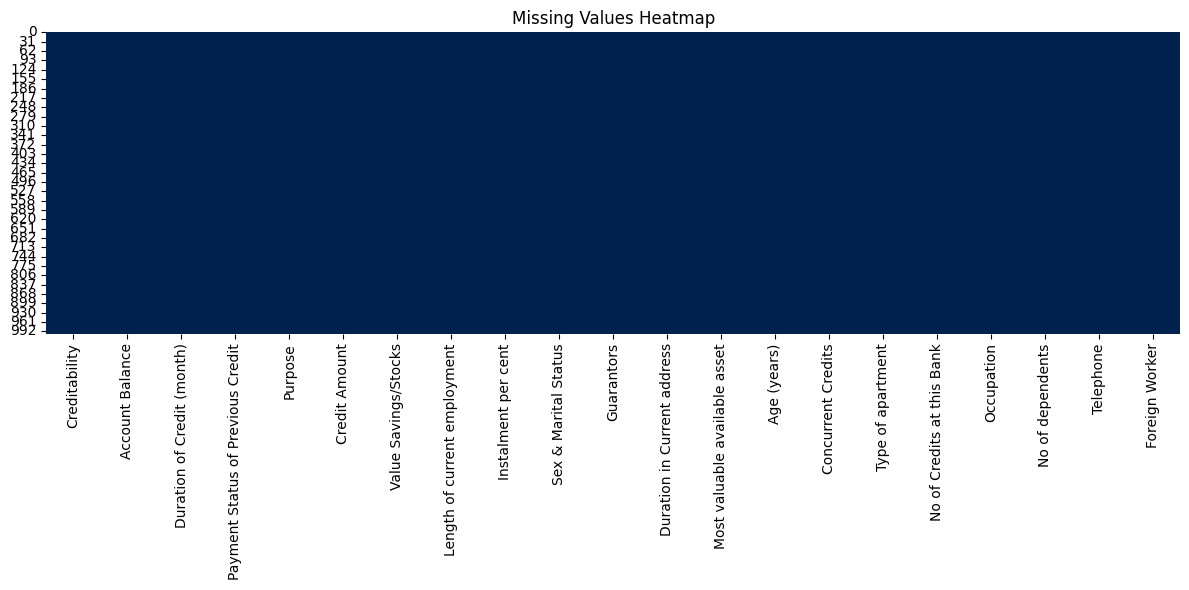

First 5 rows:
   Creditability  Account Balance  Duration of Credit (month)  \
0              1                1                          18   
1              1                1                           9   
2              1                2                          12   
3              1                1                          12   
4              1                1                          12   

   Payment Status of Previous Credit  Purpose  Credit Amount  \
0                                  4        2           1049   
1                                  4        0           2799   
2                                  2        9            841   
3                                  4        0           2122   
4                                  4        0           2171   

   Value Savings/Stocks  Length of current employment  Instalment per cent  \
0                     1                             2                    4   
1                     1                             3 

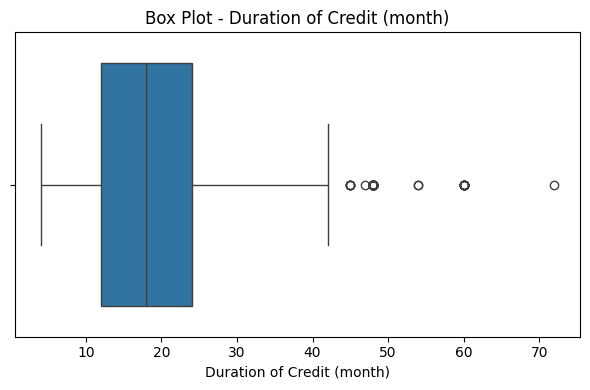

Outliers in Credit Amount: 72


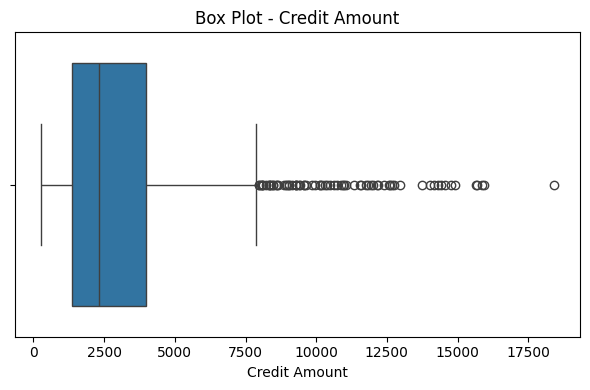

Outliers in Age (years): 23


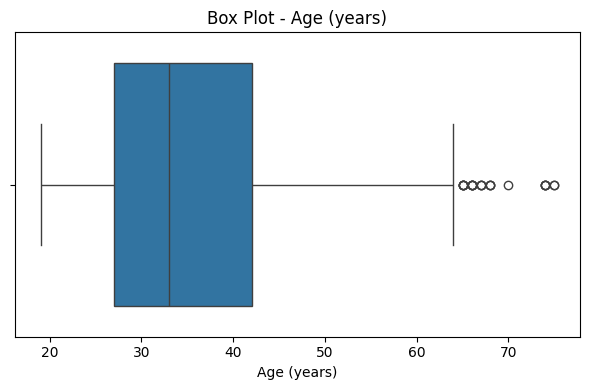

Outliers in No of Credits at this Bank: 6


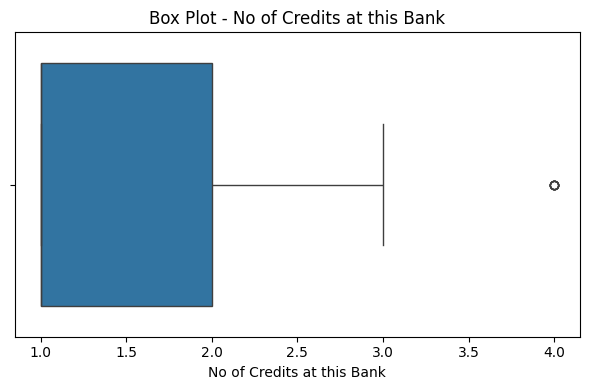

Outliers in No of dependents: 155


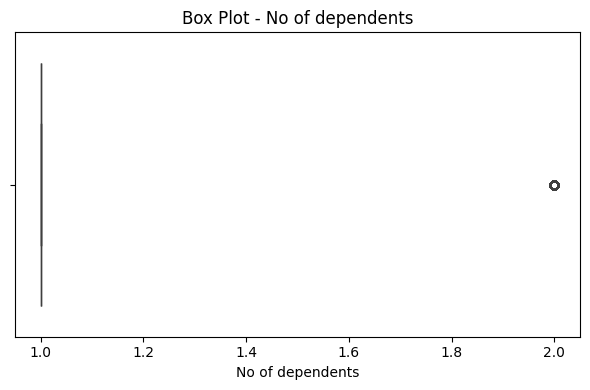

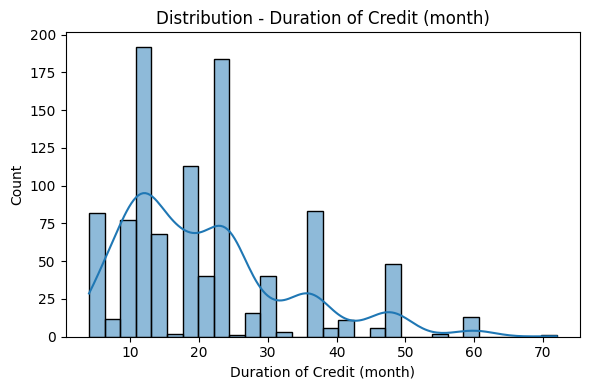

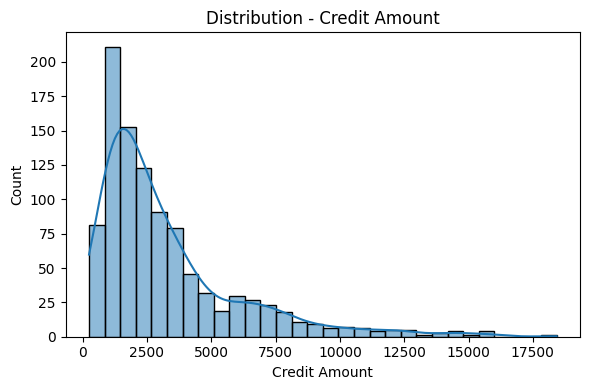

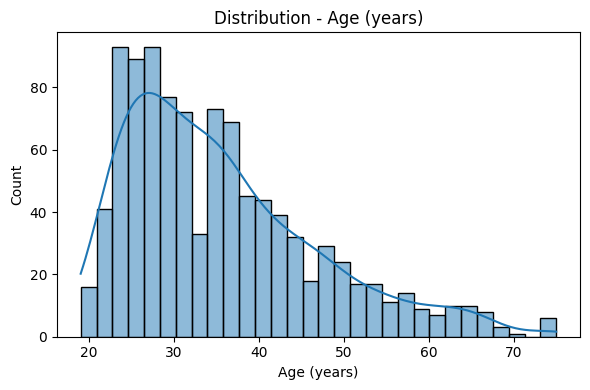

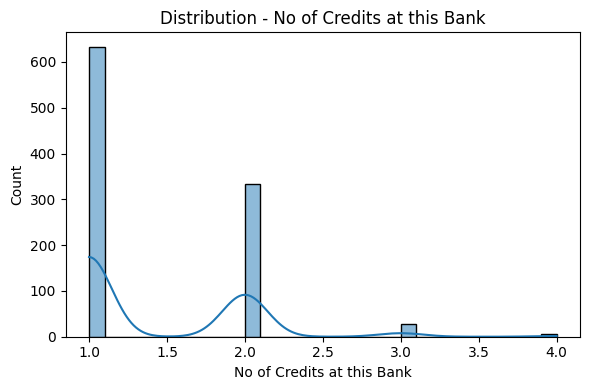

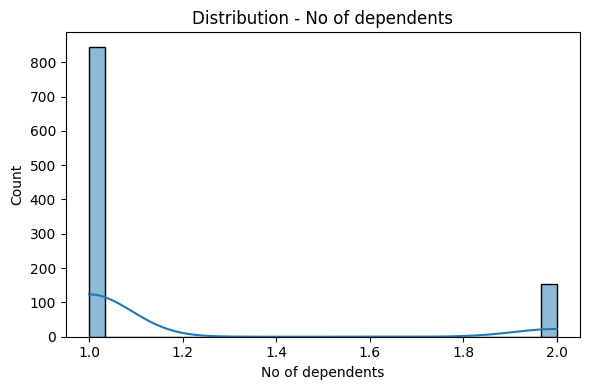


Descriptive Statistics:
Duration of Credit (month) -> Mean: 20.90, Min: 4, Max: 72, Std Dev: 12.06
Credit Amount -> Mean: 3271.25, Min: 250, Max: 18424, Std Dev: 2822.75
Age (years) -> Mean: 35.54, Min: 19, Max: 75, Std Dev: 11.35
No of Credits at this Bank -> Mean: 1.41, Min: 1, Max: 4, Std Dev: 0.58
No of dependents -> Mean: 1.16, Min: 1, Max: 2, Std Dev: 0.36


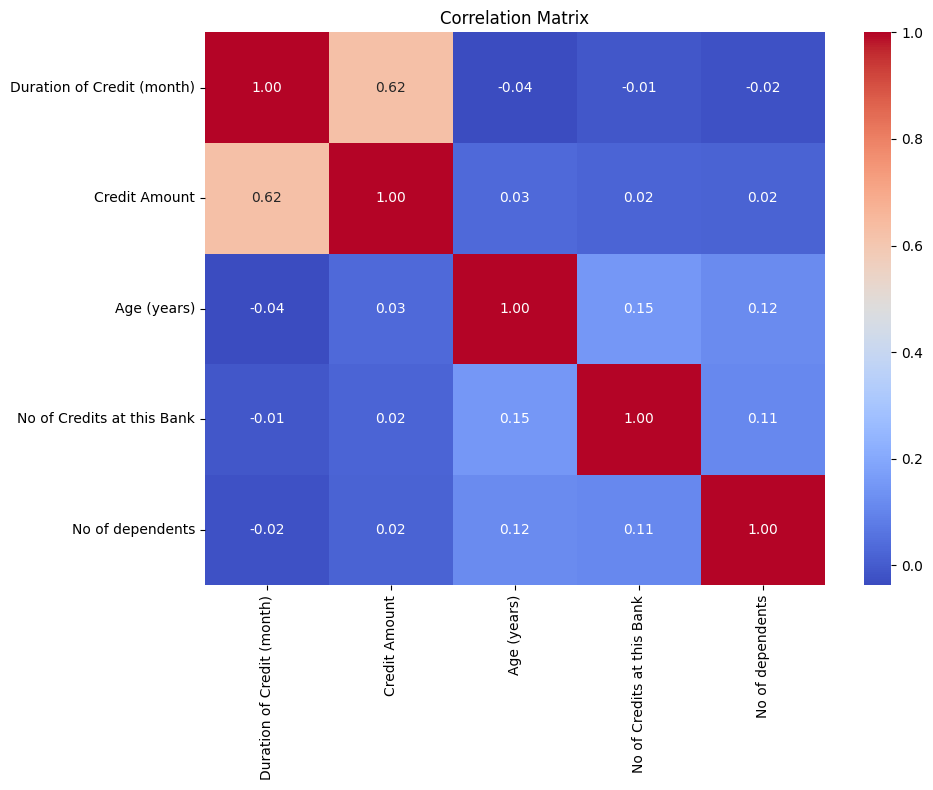

In [ ]:
# Check for missing values
print("\nMissing Values (Count):")
print(df.isnull().sum())

missing_percent = (df.isnull().sum() / len(df)) * 100
print("\nMissing Values (Percentage):")
print(missing_percent[missing_percent > 0])

# Force display of heatmap regardless of missing count
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='cividis')
plt.title("Missing Values Heatmap")
plt.tight_layout()
plt.savefig("missing_values_heatmap.png")
plt.show()

# Show basic information
print("First 5 rows:")
print(df.head())

print("\nDescriptive statistics:")
print(df.describe())

# Detect outliers using IQR method and boxplots
def find_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    print(f"Outliers in {column}: {len(outliers)}")
    return outliers

numeric_cols = ['Duration of Credit (month)', 'Credit Amount', 'Age (years)',
                'No of Credits at this Bank', 'No of dependents']

for col in numeric_cols:
    outliers = find_outliers_iqr(df, col)
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot - {col}')
    plt.tight_layout()
    plt.show()

# Histograms
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution - {col}')
    plt.tight_layout()
    plt.show()

# Mean, Min, Max, Std Dev
print("\nDescriptive Statistics:")
for col in numeric_cols:
    print(f"{col} -> Mean: {df[col].mean():.2f}, Min: {df[col].min()}, Max: {df[col].max()}, Std Dev: {df[col].std():.2f}")

# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()


In [ ]:
from google.colab import files
uploaded = files.upload()



Saving german_credit..arff to german_credit. (4).arff


In [ ]:
! pip install python-weka-wrapper3

In [ ]:
import os
import sys
sys.path
sys.path.append("/usr/lib/jvm/java-11-openjdk-amd64/bin/")
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64/"

In [ ]:
import weka.core.jvm as jvm
jvm.start()


DEBUG:weka.core.jvm:Adding bundled jars
DEBUG:weka.core.jvm:Classpath=['/usr/local/lib/python3.11/dist-packages/weka/lib/python-weka-wrapper.jar', '/usr/local/lib/python3.11/dist-packages/weka/lib/mtj.jar', '/usr/local/lib/python3.11/dist-packages/weka/lib/core.jar', '/usr/local/lib/python3.11/dist-packages/weka/lib/arpack_combined.jar', '/usr/local/lib/python3.11/dist-packages/weka/lib/weka.jar']
DEBUG:weka.core.jvm:MaxHeapSize=default
DEBUG:weka.core.jvm:Package support disabled


In [ ]:
from weka.core.converters import Loader
from weka.core.classes import Random
from weka.classifiers import Classifier, Evaluation

In [ ]:
from google.colab import files
uploaded = files.upload()
loader = Loader(classname="weka.core.converters.ArffLoader")
# Get the uploaded filename from the 'uploaded' dictionary
data_file = list(uploaded.keys())[0]  # Assuming only one file is uploaded

data = loader.load_file(data_file)

print('Data set size: ', data.num_instances)

Saving german_credit..arff to german_credit. (5).arff
Data set size:  1000


In [ ]:
#Let's look at the attributes and their types
# We have two data types here: categorical and numeric.
for i in range(data.num_attributes):
  print ("index ",i)
  print(data.attribute(i))

index  0
@attribute Creditability {0,1}
index  1
@attribute 'Account Balance' {1,2,3,4}
index  2
@attribute 'Duration of Credit (month)' numeric
index  3
@attribute 'Payment Status of Previous Credit' {0,1,2,3,4}
index  4
@attribute Purpose {0,1,2,3,4,5,6,8,9,10}
index  5
@attribute 'Credit Amount' numeric
index  6
@attribute 'Value Savings/Stocks' {1,2,3,4,5}
index  7
@attribute 'Length of current employment' {1,2,3,4,5}
index  8
@attribute 'Instalment per cent' numeric
index  9
@attribute 'Sex & Marital Status' {1,2,3,4}
index  10
@attribute Guarantors {1,2,3}
index  11
@attribute 'Duration in Current address' {1,2,3,4}
index  12
@attribute 'Most valuable available asset' {1,2,3,4}
index  13
@attribute 'Age (years)' numeric
index  14
@attribute 'Concurrent Credits' {1,2,3}
index  15
@attribute 'Type of apartment' {1,2,3}
index  16
@attribute 'No of Credits at this Bank' numeric
index  17
@attribute Occupation {1,2,3,4}
index  18
@attribute 'No of dependents' numeric
index  19
@attrib

In [ ]:

# index of class atrribute is 0 (Creditability) for German credit card
# Again, you can see all the index numbers for attributes by running the previous cell
class_idx=0
print('Will be classifying on: ', data.attribute(class_idx))
data.class_index = class_idx

Will be classifying on:  @attribute Creditability {0,1}


In [ ]:
# Splitting 66% for training and 34% for testing using a seed of 1 for random number generator
train, test = data.train_test_split(66.0, Random(1))

In [ ]:
# We are generating a pruned C4.5 decision tree, with a confidence factor used for pruning of 0.25.
# You can change it to different threshold values to change the size of the tree.
cls = Classifier(classname="weka.classifiers.trees.J48", options=["-C", "0.25"])
cls.build_classifier(train)
# See the tree below.
print(cls)

J48 pruned tree
------------------

Account Balance = 1
|   Duration of Credit (month) <= 11
|   |   Payment Status of Previous Credit = 0: 1 (0.0)
|   |   Payment Status of Previous Credit = 1: 1 (0.0)
|   |   Payment Status of Previous Credit = 2
|   |   |   Instalment per cent <= 3: 1 (8.0/1.0)
|   |   |   Instalment per cent > 3: 0 (2.0)
|   |   Payment Status of Previous Credit = 3: 1 (0.0)
|   |   Payment Status of Previous Credit = 4: 1 (15.0)
|   Duration of Credit (month) > 11
|   |   Guarantors = 1
|   |   |   Occupation = 1: 0 (2.0)
|   |   |   Occupation = 2
|   |   |   |   Most valuable available asset = 1: 1 (8.0/2.0)
|   |   |   |   Most valuable available asset = 2: 1 (3.0)
|   |   |   |   Most valuable available asset = 3
|   |   |   |   |   Credit Amount <= 1797: 0 (5.0/1.0)
|   |   |   |   |   Credit Amount > 1797: 1 (4.0)
|   |   |   |   Most valuable available asset = 4: 0 (3.0)
|   |   |   Occupation = 3
|   |   |   |   Duration of Credit (month) <= 30
|   |   |  

In [ ]:
!apt-get install graphviz libgraphviz-dev pkg-config
!pip install pygraphviz
import weka.plot.graph as graph  # If pygrpahviz is installed, you can plot the graph of tree too but it may not work
graph.plot_dot_graph(cls.graph)

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
pkg-config is already the newest version (0.29.2-1ubuntu3).
graphviz is already the newest version (2.42.2-6ubuntu0.1).
libgraphviz-dev is already the newest version (2.42.2-6ubuntu0.1).
The following packages were automatically installed and are no longer required:
  libbz2-dev libpkgconf3 libreadline-dev
Use 'apt autoremove' to remove them.
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


In [ ]:
import weka.plot.graph as graph  # If pygrpahviz is installed, you can plot the graph of tree too but it may not work
graph.plot_dot_graph(cls.graph)

In [ ]:
# prompt: write a code to make a graph for the decision tree above

import weka.plot.graph as graph

# Assuming 'cls' is your trained J48 classifier as in your provided code
# If cls is not defined, you'll need to define and train it as in your example

# Check if pygraphviz is installed correctly before plotting
try:
    graph.plot_dot_graph(cls.graph)
except Exception as e:
    print(f"Error plotting the graph: {e}")
    print("Please make sure pygraphviz is installed correctly.")
    print("You can try reinstalling it: !pip install pygraphviz")
    print("and make sure graphviz is installed: !apt-get install graphviz libgraphviz-dev pkg-config")


In [ ]:
# Let's evaluate it on the test set

evl = Evaluation(train)
evl.test_model(cls, test)
print(evl.summary())


Correctly Classified Instances         246               72.3529 %
Incorrectly Classified Instances        94               27.6471 %
Kappa statistic                          0.3214
Mean absolute error                      0.3367
Root mean squared error                  0.4776
Relative absolute error                 78.156  %
Root relative squared error             99.5787 %
Total Number of Instances              340     



In [ ]:
# Here are all the metrics
#print ("Class Index ", class_idx)
print("Classes at different positions are ",data.attribute(class_idx))

print("confusion Matrix")
#Note that the TP here will be for the class at the first position printed by the previous line and TN will be for the class at second position
print(evl.confusion_matrix)

###############
# Print metrics for the first class
##############
class_position=0
print("")
print ("Evaluation from the perspective of class at position "+ str(class_position))
print("TP ",evl.true_positive_rate(class_position))
print("FP",evl.false_positive_rate(class_position))
print("Precision ",evl.precision(class_position))
print("Recall ",evl.recall(class_position))


###############
# Print metrics for the second class
##############
class_position=1
print("")
print ("Evaluation from the perspective of class at position "+ str(class_position))
print("TP ",evl.true_positive_rate(class_position))
print("FP",evl.false_positive_rate(class_position))
print("Precision ",evl.precision(class_position))
print("Recall ",evl.recall(class_position))


Classes at different positions are  @attribute Creditability {0,1}
confusion Matrix
[[ 46.  71.]
 [ 23. 200.]]

Evaluation from the perspective of class at position 0
TP  0.39316239316239315
FP 0.1031390134529148
Precision  0.6666666666666666
Recall  0.39316239316239315

Evaluation from the perspective of class at position 1
TP  0.8968609865470852
FP 0.6068376068376068
Precision  0.7380073800738007
Recall  0.8968609865470852


In [ ]:
from weka.attribute_selection import ASSearch, ASEvaluation, AttributeSelection
search = ASSearch(classname="weka.attributeSelection.BestFirst", options=["-D", "1", "-N", "5"])
evaluator = ASEvaluation(classname="weka.attributeSelection.CfsSubsetEval", options=["-P", "1", "-E", "1"])
attsel = AttributeSelection()
attsel.search(search)
attsel.evaluator(evaluator)
attsel.select_attributes(data)

print("# attributes: " + str(attsel.number_attributes_selected))
print("attributes: " + str(attsel.selected_attributes))
print("result string:\n" + attsel.results_string)

# attributes: 3
attributes: [1. 2. 3. 0.]
result string:


=== Attribute Selection on all input data ===

Search Method:
	Best first.
	Start set: no attributes
	Search direction: forward
	Stale search after 5 node expansions
	Total number of subsets evaluated: 133
	Merit of best subset found:    0.076

Attribute Subset Evaluator (supervised, Class (nominal): 1 Creditability):
	CFS Subset Evaluator
	Including locally predictive attributes

Selected attributes: 2,3,4 : 3
                     Account Balance
                     Duration of Credit (month)
                     Payment Status of Previous Credit



In [ ]:
# As you see above, we only attributes 2,3 and 4 are important as judged by Weka for German Credit card data set. So we are going to load
# data again and remove all the attributes from 5-21. Atrribute at index 1 is the class atrribute, so we'll keep that too
from weka.filters import Filter

data2 = loader.load_file(data_file)
# Filtering method 1
remove = Filter(classname="weka.filters.unsupervised.attribute.Remove", options=["-R", "5-21"])
remove.inputformat(data2)
filtered_data = remove.filter(data2)

print(filtered_data.subset(row_range="1-10"))

@relation 'german_credit-weka.filters.unsupervised.attribute.Remove-R5-21-weka.filters.unsupervised.instance.RemoveRange-V-R1-10-weka.filters.MultiFilter-Fweka.filters.unsupervised.instance.RemoveRange -V -R 1-10-S1'

@attribute Creditability {0,1}
@attribute 'Account Balance' {1,2,3,4}
@attribute 'Duration of Credit (month)' numeric
@attribute 'Payment Status of Previous Credit' {0,1,2,3,4}

@data
1,1,18,4
1,1,9,4
1,2,12,2
1,1,12,4
1,1,12,4
1,1,10,4
1,1,8,4
1,1,6,4
1,4,18,4
1,2,24,2


In [ ]:
for i in range(filtered_data.num_attributes):
  print ("index ",i)
  print(filtered_data.attribute(i))

index  0
@attribute Creditability {0,1}
index  1
@attribute 'Account Balance' {1,2,3,4}
index  2
@attribute 'Duration of Credit (month)' numeric
index  3
@attribute 'Payment Status of Previous Credit' {0,1,2,3,4}


In [ ]:
# index of class atrribute is 0 (Creditability) for German credit card
# Again, you can see all the index numbers for attributes by running the previous cell
class_idx=0
print('Will be classifying on: ', filtered_data.attribute(class_idx))
filtered_data.class_index = class_idx

Will be classifying on:  @attribute Creditability {0,1}


In [ ]:
# Splitting 66% for training and 34% for testing using a seed of 1 for random number generator
train, test = filtered_data.train_test_split(66.0, Random(1))

In [ ]:
# We are generating a pruned C4.5 decision tree, with a confidence factor used for pruning of 0.25.
# You can change it to different threshold values to change the size of the tree.
cls = Classifier(classname="weka.classifiers.trees.J48", options=["-C", "0.25"])
cls.build_classifier(train)
# See the tree below.
print(cls)

J48 pruned tree
------------------

Account Balance = 1
|   Payment Status of Previous Credit = 0: 0 (9.0/3.0)
|   Payment Status of Previous Credit = 1: 0 (17.0/6.0)
|   Payment Status of Previous Credit = 2
|   |   Duration of Credit (month) <= 16: 1 (36.0/11.0)
|   |   Duration of Credit (month) > 16: 0 (61.0/26.0)
|   Payment Status of Previous Credit = 3: 0 (8.0/1.0)
|   Payment Status of Previous Credit = 4: 1 (48.0/12.0)
Account Balance = 2
|   Payment Status of Previous Credit = 0: 0 (12.0/5.0)
|   Payment Status of Previous Credit = 1: 0 (9.0/3.0)
|   Payment Status of Previous Credit = 2
|   |   Duration of Credit (month) <= 42: 1 (85.0/30.0)
|   |   Duration of Credit (month) > 42: 0 (4.0)
|   Payment Status of Previous Credit = 3: 1 (22.0/6.0)
|   Payment Status of Previous Credit = 4: 1 (35.0/9.0)
Account Balance = 3: 1 (41.0/9.0)
Account Balance = 4: 1 (273.0/30.0)

Number of Leaves  : 	14

Size of the tree : 	19



In [ ]:
# Let's evaluate it on the test set

evl = Evaluation(train)
evl.test_model(cls, test)
print(evl.summary())


Correctly Classified Instances         248               72.9412 %
Incorrectly Classified Instances        92               27.0588 %
Kappa statistic                          0.3417
Mean absolute error                      0.3581
Root mean squared error                  0.4392
Relative absolute error                 83.1278 %
Root relative squared error             91.5696 %
Total Number of Instances              340     



In [ ]:
# Here are all the metrics
#print ("Class Index ", class_idx)
print("Classes at different positions are ",filtered_data.attribute(class_idx))

print("confusion Matrix")
#Note that the TP here will be for the class at the first position printed by the previous line and TN will be for the class at second position
print(evl.confusion_matrix)

###############
# Print metrics for the first class
##############
class_position=0
print("")
print ("Evaluation from the perspective of class at position "+ str(class_position))
print("TP ",evl.true_positive_rate(class_position))
print("FP",evl.false_positive_rate(class_position))
print("Precision ",evl.precision(class_position))
print("Recall ",evl.recall(class_position))


###############
# Print metrics for the second class
##############
class_position=1
print("")
print ("Evaluation from the perspective of class at position "+ str(class_position))
print("TP ",evl.true_positive_rate(class_position))
print("FP",evl.false_positive_rate(class_position))
print("Precision ",evl.precision(class_position))
print("Recall ",evl.recall(class_position))

Classes at different positions are  @attribute Creditability {0,1}
confusion Matrix
[[ 49.  68.]
 [ 24. 199.]]

Evaluation from the perspective of class at position 0
TP  0.4188034188034188
FP 0.10762331838565023
Precision  0.6712328767123288
Recall  0.4188034188034188

Evaluation from the perspective of class at position 1
TP  0.8923766816143498
FP 0.5811965811965812
Precision  0.7453183520599251
Recall  0.8923766816143498
